[View in Colaboratory](https://colab.research.google.com/github/getmrinal/ML-Notebook/blob/master/20.%20UsedCarProject/usedCar_(1).ipynb)

In [0]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
file_list = drive.ListFile({'q': "'1vrFHzEYTZkF_vJvn7KYh6OhYLphLvzsX' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: usedCar (1).ipynb, id: 1MQfwgtBe4cDvDxKVR0LMhZ7yCniQp1vP
title: training_car_x_y_train.csv, id: 1zlM6O3hRKRDDrZiHckN6hS47OrDCFbes
title: test_car_x_test.csv, id: 135y12U31V8x_AbZbljipl4x2ap_9Jt6O
title: gridsearch.ipynb, id: 1xg3RWCn9XWGsgRAIyyzx83IuwJNC9ihC
title: LFW Images.ipynb, id: 1330yF8WwmygsTMy5MFZKhJLo__G4zLoM
title: pcaOnImages.ipnyb, id: 1_FlBAG_xkU7rVSVv62XHsi3J9SMaG83n
title: PCA-3D & implemented too.ipynb, id: 1emU3-kPQC6q8EgUGns4NMC_zNr6LUcRq
title: PCABreast.ipynb, id: 1zVMkPtovuzC0gEYtFaKytxOimZ5A0JEO
title: PCA2D.ipynb, id: 1FzQ1b3WBdAbywGN4AtriaEBU1hVoXInn
title: SVM_on_iris.ipynb, id: 1B9IdO1zW0dfyZnojXCLH3-n7APnRJLCJ
title: SVM.ipynb, id: 1XEzBC3-3-xHST-UDjLw-YNB9lIIGIrSi
title: SVMDummyData.ipynb, id: 1Ws7bZKKOcumR-HClj4OstUlUoMeTUUNX
title: TextClassification & MultinomialScratch.ipynb, id: 1sF1QO54CTko6yG19c7vMY0BfopeiJaDh
title: textClassification.csv, id: 1lQPcPwbGsxvrtWi5vl4PnQS5VbC-VCoX
title: Copy of textClassification.ipynb, id: 1LigqoQQ4coVPfNbDVA

In [0]:
data = drive.CreateFile({'id': '1zlM6O3hRKRDDrZiHckN6hS47OrDCFbes'})
data.GetContentFile('training_car_x_y_train.csv')
test_data = drive.CreateFile({'id': '135y12U31V8x_AbZbljipl4x2ap_9Jt6O'})
test_data.GetContentFile('test_car_x_test.csv')



In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from google.colab import files as filess
from datetime import datetime
import time
from sklearn.preprocessing import  OneHotEncoder

In [0]:
car_data = pd.read_csv('training_car_x_y_train.csv')
test_data = pd.read_csv('test_car_x_test.csv')

In [6]:
list(car_data)

['dateCrawled',
 'name',
 'seller',
 'offerType',
 'abtest',
 'vehicleType',
 'yearOfRegistration',
 'gearbox',
 'powerPS',
 'model',
 'kilometer',
 'monthOfRegistration',
 'fuelType',
 'brand',
 'notRepairedDamage',
 'dateCreated',
 'nrOfPictures',
 'postalCode',
 'lastSeen',
 'price']

In [7]:
car_data.describe(include='all')

,dateCrawled,name,seller,offerType,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,price
count,297369,297369,297369,297369,297369,267059,297369.000000,281192,297369.000000,280909,297369.000000,297369.000000,270535,297369,239636,297369,297369.0,297369.000000,297369,2.973690e+05
unique,237974,191674,2,2,2,8,NaN,2,NaN,250,NaN,NaN,7,40,2,104,NaN,NaN,155478,NaN
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-06 13:45:54,NaN
freq,7,508,297367,297358,154051,76608,NaN,219378,NaN,24126,NaN,NaN,179170,63732,210546,11589,NaN,NaN,16,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2004.471700,NaN,115.183674,NaN,125553.218392,5.740087,NaN,NaN,NaN,NaN,0.0,50836.861472,NaN,1.118790e+04
std,NaN,NaN,NaN,NaN,NaN,NaN,89.562153,NaN,181.360569,NaN,40133.443442,3.714925,NaN,NaN,NaN,NaN,0.0,25799.728603,NaN,6.615699e+05
min,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,100000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30459.000000,NaN,1.150000e+03
50%,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49610.000000,NaN,2.950000e+03
75%,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71554.000000,NaN,7.200000e+03


In [8]:
car_data.head()

,dateCrawled,name,seller,offerType,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,price
0,2016-03-06 09:45:45,Volkswagen_Golf_Variant_1.9_TDI_Trendline,privat,Angebot,control,kombi,2009,manuell,105,golf,150000,4,diesel,volkswagen,nein,2016-03-06 00:00:00,0,24220,2016-03-26 14:16:37,5999
1,2016-03-25 16:57:48,Twingo_Baujahr_2000,privat,Angebot,control,kleinwagen,2000,manuell,58,twingo,150000,2,benzin,renault,nein,2016-03-25 00:00:00,0,47167,2016-03-28 17:16:47,0
2,2016-03-24 08:36:58,BMW_325d_Touring,privat,Angebot,control,kombi,2007,manuell,197,3er,150000,5,diesel,bmw,ja,2016-03-24 00:00:00,0,74535,2016-03-24 09:50:27,6100
3,2016-04-05 07:36:37,BMW_E36_320i_Touring_M_Paket_Avusblau_individual,privat,Angebot,test,NaN,2000,manuell,150,NaN,150000,9,NaN,bmw,NaN,2016-04-05 00:00:00,0,46047,2016-04-05 09:44:06,1200
4,2016-03-09 17:58:02,Mercedes_Benz_A_140,privat,Angebot,test,limousine,1999,automatik,82,a_klasse,150000,12,benzin,mercedes_benz,nein,2016-03-09 00:00:00,0,25451,2016-03-22 04:44:36,2500


In [9]:
#nrOfPictures
print(car_data['nrOfPictures'].sum())
print(test_data['nrOfPictures'].sum())

0
0


In [10]:
#0 value we should drop this
fin_data=car_data.drop('nrOfPictures',1)
test_data1 = test_data.drop('nrOfPictures',1)
#seller
print(fin_data.groupby('seller').size())

seller
gewerblich         2
privat        297367
dtype: int64


In [11]:
#we can remove 3 rows containing geweblich and all will be private
fin_data = fin_data[fin_data.seller != 'gewerblich']
test_data1 = test_data1[test_data1.seller != 'gewerblich']
fin_data=fin_data.drop('seller',1)
test_data1 = test_data1.drop('seller',1)
#offerType
print(fin_data.groupby('offerType').size())

offerType
Angebot    297356
Gesuch         11
dtype: int64


In [12]:
#same for offerType no need of these 11 rows
fin_data = fin_data[fin_data.offerType != 'Gesuch']
test_data1 = test_data1[test_data.offerType != 'Gesuch']
fin_data=fin_data.drop('offerType',1)
test_data1 = test_data1.drop('offerType',1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [13]:
print(list(test_data1))
print(list(fin_data))

['dateCrawled', 'name', 'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen']
['dateCrawled', 'name', 'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen', 'price']


In [14]:
#name
print(len(fin_data.groupby('name').size()))

191661


In [0]:
#many unique val in name can able to predict conclusions based on this hence drop this too
fin_data=fin_data.drop('name',1)
test_data1 = test_data1.drop('name',1)


In [0]:
#none of our buisness
fin_data=fin_data.drop('abtest',1)

In [0]:
test_data1 = test_data1.drop('abtest',1)


In [0]:
t_data=fin_data.sample(n=10000, random_state=1)

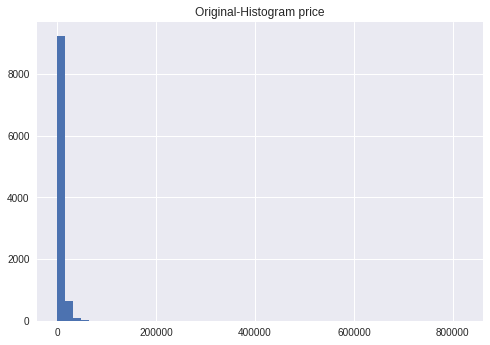

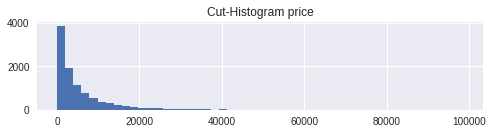

8649 cars with price 0


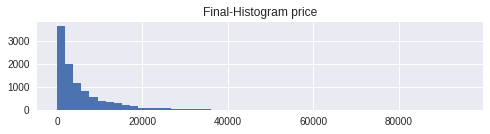

In [19]:
t_data['price'].hist(bins=50)
plt.title('Original-Histogram price')
plt.show()
fin_data = fin_data[fin_data.price < 100000]
t_data=fin_data.sample(n=10000, random_state=1)

plt.subplot(3,1,2)
t_data['price'].hist(bins=50)
plt.title('Cut-Histogram price')
plt.show()

print(len(fin_data[fin_data.price == 0]), 'cars with price 0')
#The other way round some people are giving their car away for free. Unlikly in such high rates. Remove!
fin_data = fin_data[fin_data.price != 0]
sample_data=fin_data.sample(n=10000, random_state=1)

plt.subplot(3,1,3)
sample_data['price'].hist(bins=50)
plt.title('Final-Histogram price')
plt.show()

In [0]:
fin_data = fin_data[(fin_data.yearOfRegistration >= 1863) & (fin_data.yearOfRegistration < 2017)]
test_data1 = test_data1[(test_data1.yearOfRegistration >= 1863) & (test_data1.yearOfRegistration < 2017)]


fin_data.loc[fin_data['monthOfRegistration'] == 0, 'monthOfRegistration'] = 1

In [0]:

test_data1.loc[test_data1['monthOfRegistration'] == 0, 'monthOfRegistration'] = 1

In [0]:
fin_data['dateRegistered'] = fin_data['yearOfRegistration'].map(str) +"-"+fin_data['monthOfRegistration'].map(str)+"-"+"01"
test_data1['dateRegistered'] = test_data1['yearOfRegistration'].map(str) +"-"+test_data1['monthOfRegistration'].map(str)+"-"+"01"

In [0]:
#hence the dateCRawlen and dateCreated are not diffrent hence drop dateCrawled
fin_data = fin_data.drop('dateCrawled',1)
fin_data = fin_data.drop('lastSeen',1)
fin_data = fin_data.drop('yearOfRegistration',1)
fin_data = fin_data.drop('monthOfRegistration',1)
test_data1 = test_data1.drop('dateCrawled',1)
test_data1 = test_data1.drop('lastSeen',1)
test_data1 = test_data1.drop('yearOfRegistration',1)
test_data1 = test_data1.drop('monthOfRegistration',1)

In [0]:
f = pd.to_datetime(fin_data['dateCreated'],format='%Y-%m')
g = pd.to_datetime(fin_data['dateRegistered'],format='%Y-%m',infer_datetime_format=True)
f1 = pd.to_datetime(test_data1['dateCreated'],format='%Y-%m')
g1 = pd.to_datetime(test_data1['dateRegistered'],format='%Y-%m',infer_datetime_format=True)

In [0]:
test_data1['age'] = f1-g1
#now no need of date created & dateRegisterred hence drop thosse
fin_data['age'] = f-g
#now no need of date created & dateRegisterred hence drop thosse

In [0]:
fin_data = fin_data.drop('dateCreated',1)
fin_data = fin_data.drop('dateRegistered',1)
test_data1 = test_data1.drop('dateCreated',1)
test_data1 = test_data1.drop('dateRegistered',1)

In [27]:
#inspecting: powerPS
print(fin_data['powerPS'].describe())

count    277179.000000
mean        116.996923
std         175.674596
min           0.000000
25%          75.000000
50%         109.000000
75%         150.000000
max       20000.000000
Name: powerPS, dtype: float64


In [28]:
fin_data.head()

,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode,price,age
0,kombi,manuell,105,golf,150000,diesel,volkswagen,nein,24220,5999,2531 days
2,kombi,manuell,197,3er,150000,diesel,bmw,ja,74535,6100,3250 days
3,NaN,manuell,150,NaN,150000,NaN,bmw,NaN,46047,1200,5695 days
4,limousine,automatik,82,a_klasse,150000,benzin,mercedes_benz,nein,25451,2500,5943 days
5,kleinwagen,manuell,60,golf,150000,benzin,volkswagen,nein,17379,1680,6066 days


In [29]:
test_data1

,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode,age
0,kleinwagen,manuell,68,aygo,70000,benzin,toyota,nein,70567,1492 days
1,limousine,manuell,265,a3,150000,benzin,audi,nein,95448,6912 days
2,coupe,manuell,170,3er,150000,benzin,bmw,nein,85467,6647 days
3,limousine,automatik,102,a_klasse,150000,benzin,mercedes_benz,nein,53757,5407 days
4,limousine,automatik,252,7er,150000,benzin,bmw,nein,47574,11991 days
5,kleinwagen,manuell,44,corsa,125000,benzin,opel,nein,53783,4143 days
6,NaN,NaN,0,NaN,150000,NaN,opel,NaN,51645,4101 days
7,limousine,manuell,88,NaN,125000,NaN,renault,ja,4329,8331 days
8,bus,manuell,69,andere,150000,diesel,peugeot,NaN,82211,4763 days
9,NaN,NaN,0,NaN,5000,NaN,audi,ja,10249,5938 days


In [0]:
#We'll remove the so-called cars with 0 PS.
#More than 1000 PS are suspicious too. 
fin_data = fin_data[(fin_data.powerPS > 0) & (fin_data.powerPS < 1000)]
test_data1 = test_data1[(test_data1.powerPS > 0) & (test_data1.powerPS < 1000)]

In [31]:
for x in list(fin_data):
  print(type(fin_data[x][0]))

<class 'str'>
<class 'str'>
<class 'numpy.int64'>
<class 'str'>
<class 'numpy.int64'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'pandas._libs.tslib.Timedelta'>


In [32]:
fin_data['age'] = fin_data['age'].dt.days
test_data1['age'] = test_data1['age'].dt.days

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
cleaned_data = fin_data

In [34]:
#clean, let's make it superclean by removing all rows with missing values
superclean_data = cleaned_data.dropna()
test_data1 = test_data1.dropna()
print(superclean_data.describe())

             powerPS      kilometer     postalCode          price  \
count  198280.000000  198280.000000  198280.000000  198280.000000   
mean      129.232510  123671.752068   52153.503319    6785.720945   
std        61.967013   39862.865721   25823.146392    8027.715077   
min         1.000000    5000.000000    1067.000000       1.000000   
25%        86.000000  100000.000000   31582.000000    1690.000000   
50%       116.000000  150000.000000   51467.000000    3999.000000   
75%       158.000000  150000.000000   73072.000000    8900.000000   
max       998.000000  150000.000000   99998.000000   99999.000000   

                 age  
count  198280.000000  
mean     4488.058090  
std      2344.135547  
min      -245.000000  
25%      2830.000000  
50%      4324.000000  
75%      5921.000000  
max     38776.000000  


**Time for One Hot Encoding**

In [0]:
test = pd.get_dummies(superclean_data)
test_data1 = pd.get_dummies(test_data1)

In [0]:
y = test['price']
test = test.drop('price',1)
x = test

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)

In [38]:
print(list(x_train))
print(list(test_data1))

['powerPS', 'kilometer', 'postalCode', 'age', 'vehicleType_andere', 'vehicleType_bus', 'vehicleType_cabrio', 'vehicleType_coupe', 'vehicleType_kleinwagen', 'vehicleType_kombi', 'vehicleType_limousine', 'vehicleType_suv', 'gearbox_automatik', 'gearbox_manuell', 'model_100', 'model_145', 'model_147', 'model_156', 'model_159', 'model_1_reihe', 'model_1er', 'model_200', 'model_2_reihe', 'model_300c', 'model_3_reihe', 'model_3er', 'model_4_reihe', 'model_500', 'model_5_reihe', 'model_5er', 'model_601', 'model_6_reihe', 'model_6er', 'model_7er', 'model_80', 'model_850', 'model_90', 'model_900', 'model_9000', 'model_911', 'model_a1', 'model_a2', 'model_a3', 'model_a4', 'model_a5', 'model_a6', 'model_a8', 'model_a_klasse', 'model_accord', 'model_agila', 'model_alhambra', 'model_almera', 'model_altea', 'model_amarok', 'model_andere', 'model_antara', 'model_arosa', 'model_astra', 'model_auris', 'model_avensis', 'model_aveo', 'model_aygo', 'model_b_klasse', 'model_b_max', 'model_beetle', 'model_b

In [0]:
a = list(x_train)
b = list(test_data1)

In [75]:
list(set(b) - set(a))

['model_discovery_sport']

In [0]:
test_data1 = test_data1.drop('model_discovery_sport',1)

In [0]:
test_data1['model_samara'] = 0
test_data1['model_kappa'] = 0
test_data1[ 'model_serie_3'] = 0
test_data1[ 'model_serie_2'] = 0
test_data1[ 'model_rangerover'] = 0

In [80]:
test_data1.shape,x_train.shape

((50318, 311), (132847, 311))

**Regression Algorithms**

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from google.colab import files as filess

In [0]:
#linear_regression
algo1 = LinearRegression()
algo1.fit(x_train,y_train)  
y_pred = algo1.predict(x_test)

In [83]:
print(algo1.score(x_test,y_test))
print(r2_score(y_test, y_pred)  )

0.7258343838932384
0.7258343838932384


In [84]:
#SGDRegressor 
algo2 =linear_model.SGDRegressor()
algo2.fit(x_train, y_train)
y_pred2 = algo2.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [85]:
print(r2_score(y_test,y_pred2))

-2.8734376693409767e+29


In [0]:
#Decision tree Regressor
algo3 = DecisionTreeRegressor(random_state=0)
algo3.fit(x_train,y_train)
y_pred3 = algo3.predict(x_test)

In [87]:
print(r2_score(y_test,y_pred3))

0.8283935103838346


In [0]:
#random forest regressor
algo4 = RandomForestRegressor()
algo4.fit(x_train, y_train)
y_pred4 = algo4.predict(x_test)

In [89]:
print(r2_score(y_test,y_pred4))

0.8952588581094697


In [0]:
# #SVR
# algo5 = SVR(C=1.0, epsilon=0.2)
# algo5.fit(x_train, y_train) 
# y_pred5 = algo5.predict(x_test)

In [0]:
#print(r2_score(y_test,y_pred5))

In [0]:
#KNN Regressor
algo6 = KNeighborsRegressor(n_neighbors=2)
algo6.fit(x_train, y_train)
y_pred6 = algo6.predict(x_test)

In [93]:
print(r2_score(y_test,y_pred6))

0.43186511662633875


In [0]:
y_predtest1 = algo1.predict(test_data1)
y_predtest2 = algo2.predict(test_data1)
y_predtest3 = algo3.predict(test_data1)
y_predtest4 = algo4.predict(test_data1)
y_predtest6 = algo4.predict(test_data1)


In [0]:
for x in range(len(y_predtest4)):
  print(type(y_predtest4[x]))

In [0]:
np.savetxt('data.csv',y_predtest4, delimiter=',')

In [0]:
filess.download('data.csv')